## 실습 목표


### 세그멘테이션의 방식을 공부합니다.


### 시맨틱 세그멘테이션 모델의 결괏값을 이해합니다.


### 시맨틱 세그멘테이션을 위한 접근 방식을 이해합니다.


## 학습 내용


### 세그멘테이션 문제의 종류


### 주요 세그멘테이션 모델


### FCN

### U-NET


### DeepLab 계열


### 세그멘테이션의 평가


### Upsampling의 다양한 방법

## 세그멘테이션 문제의 종류

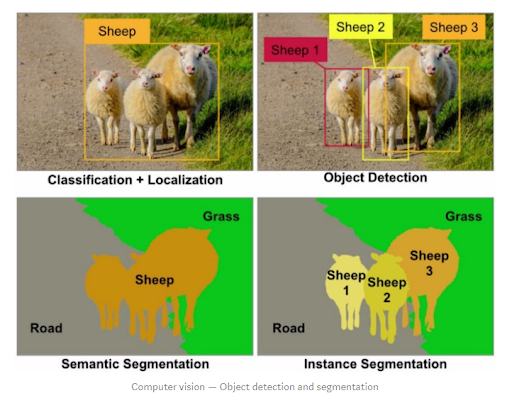
http://machinelearningkorea.com/2019/07/13/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B3%84-%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C/

*좌상단: 영역의 위치 인식(localization)과 물체들의 클래스를 판별(classification)접근법을 보여줍니다.

*우상단: 개별 물체들의 개체 하나하나의 위치를 식별하는 객체 인식(object detection)의 접근법을 보여줍니다.



### 시맨틱 세그멘테이션(Semantic segmentation)

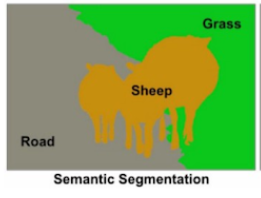

시맨틱 세그멘테이션은 영역(class)을 정확히 구분을 하지만 객체 인식을 하진 않는 것이라고 말할 수 있습니다.. 

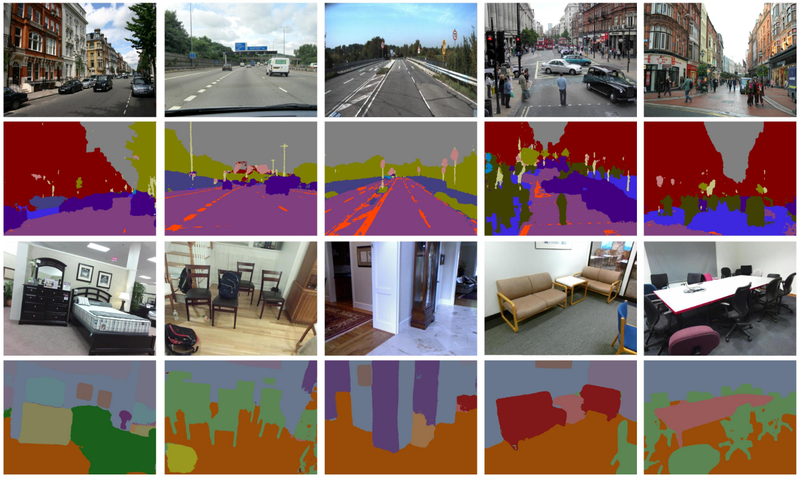


####  U-Net

- 입력: 572 x 572 이미지

- 출력: 388 x 388 크기에 두 가지의 클래스를 가진 세그멘테이션 맵

- 결과: 클래스에 따른 시맨틱 세그멘테이션맵을 얻을 수 있습니다.


### 인스턴스 세그멘테이션(Instance segmentation)

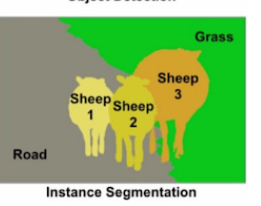


인스턴스 세그멘테이션은 각 영역의 개체(instance)들의 영역을 픽셀 단위로 정확하게 구분하는 것으로 객체인식과 결과는 유사합니다.

#### Mask R-CNN

Faster R-CNN을 계승한 것으로 핵심 아이디어인 Region of Interest Pooling Layer(RoIPool)개념을 개선하고 Segmentation에 유리한 RoIAlign그리고 클래스별 마스크 분리라는 두 가지 아이디어를 이용합니다.


이로 인해, 클래스별 Object Detection과 시멘틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것입니다.


### RoIPool

*개념

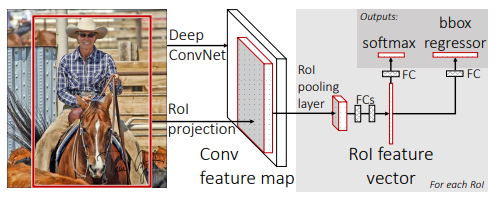

RoIPool Layer는 다양한 RoI영역을 Pooling을 통해 동일 크기의 feature map을 추출하는 레어이고, 이후에 고정 사이지의 특성맵을 바탕으로 바운딩 박스와 물체의 클래스를 추론합니다.


*한계

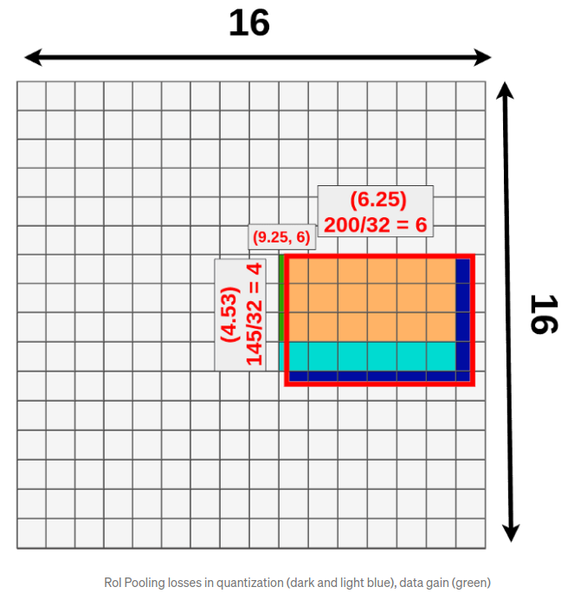

물체의 영역을 정확한 마스킹이 필요한 Segmentation문제에서는 위의 방식이 단점이 될 수 있습니다.

왜냐하면, RoIPool과정에서 Quantization이 필요하다는 것입니다.


위의 그림을 예시로 들면, 16x16으로 분할을하고 이미지에서 RoI영역의 크기는 다양하지만 모든 RoI영역의 가로/ 세로 픽셀 크기는 16배수가 아닙니다.


이로 인해, 절반이상이 덮인 곳이 끼워맞추다가 버려지는영역이 생기게되어 정보손실과 왜곡을 불러일으킵니다.


*개선

RoIAlign방식으로 개선하고 세그멘테이션을 더하는 방식을 이용하면 문제를 개선할 수 있습니다.

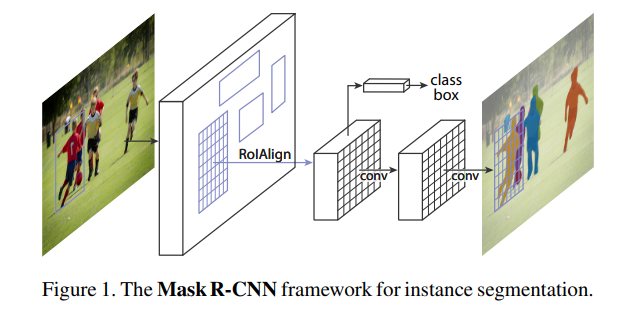

위의 이미지를 예시로 들어 설명하자면, U-Net처럼 특성 맵의 크기를 키워서 마스크를 생성해 내는 부분을 통해 인스턴스에 해당 영역인 인스턴스 맵을 추론합니다.


Mask R-CNN은 클래스에 따른 마스크를 예측할 때 여러 가지 테스크를 한 모델로 학습하여 검출의 성능을 높입니다.




---


## 주요 세그멘테이션 모델


### FCN(Fully Convolutional Network)

*FCN 설명

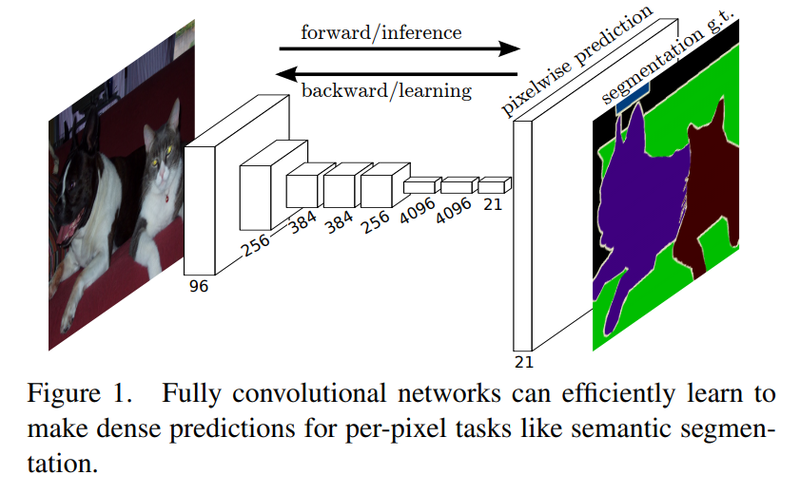


FCN은 이미지넷 챌린지에서 좋은 성적은 낸 AlexNet, VGG-16등의 모델을 세그멘테이션에 맞게 변형한 모델입니다.


VGG모델의 네트워크 뒷단에 fully connected layer대신 CNN을 붙여줍니다.

왜냐하면, CNN은 이미지 내 위치의 특성을 유지하면서 클래스 단위의 히트맵을 얻을 수 있습니다.

*CNN의 커널 크기는 1X1, 클래스의 개수만큼의 채널을 갖게되면 클래스 히트맵을 얻게 됩니다.*



*Upsampling

히트맵이 CNN과 pooling을 거치면 크기가 줄어드는데 이를 키워주는 방법을 말합니다.

- Deconvolution

컨볼루션 연산을 거꾸로 해준 것입니다.

- Interpolation

보간법으로 주어진 값을 이용하여 추정해야하는 픽셀을 추리하는 방식입니다.


Linear interpolation: 1차원 상의 두 개의 점 사이에서 거리 비에 따라 추정하는 것이라고 합니다.

Bilinear interpolation: 2차원으로 확장해서 4개의 점 사이에서 어떤 점의 값을 추정하는 것이라고 합니다.

*FCN32-s

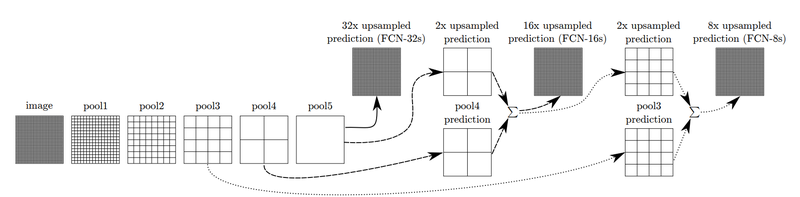


*Skip Architecture


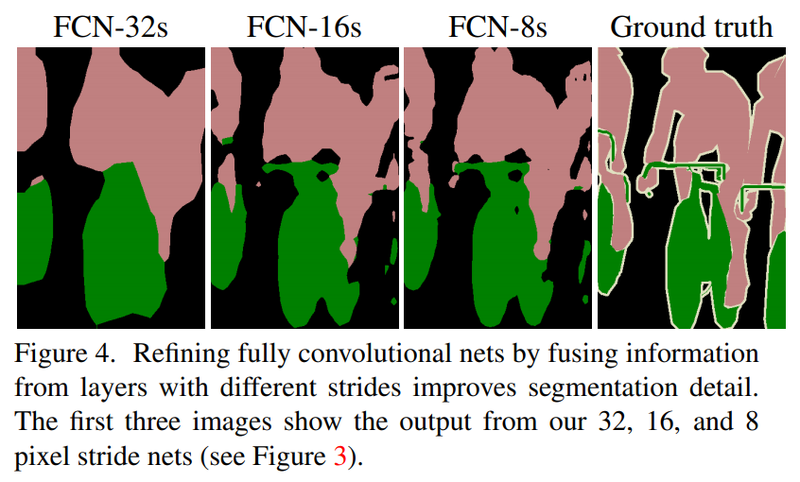


위의 사진은, FCN-32s, FCN-16s, FCN- 8s를 구분하여 설명한 것입니다.

FCN-16s는 앞쪽 블록에서 얻은 예측결과 맵과 2배로 upsampling한 맵을 더한 후에, 한 번에 16배로 upsampling해주어 얻습니다.

이 기법을 한 번 더 사용하면 FCN 8-s를 얻게 됩니다.


### U-Net

*개요

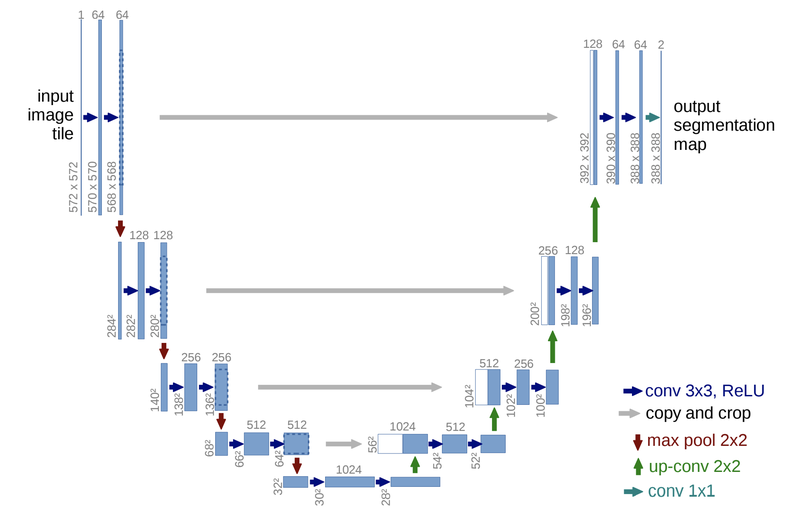

FCN에서 upsampling을 통해서 특성맵을 키운 것을 입력값과 대칭적으로 만들어준 것으로 네트워크 구조가 U자형입니다.


*전체 구조

- 좌측 Contracting path

> 우리가 익히 사용했던 convolution netork와 유사한 구조를 갖고, 각 블록은 두 개의 3x3 convolution계층과 ReLu를 가진 후 downsamling을 위해 2x2커널을 stride =2로 max pooling합니다. 참고로, downsampling를 거친 후 convolution의 채널 크기는 두 배가 됩니다.

- 우측 Expansive path

> 각 블록에 2x2 up-convolution이 붙어서 채널이 절반씩 줄고 특성 맵의 크기는 늘어나고, contracting block와 동일하게 3x3 convolution이 두 개씩 사용이 됩니다.



- skip connection

> Contracting path 와 Expansive path에서 크기가 같은 블록의 출력과 입력을 연결하여 low-level의 feature를 활용할 수 있게 합니다. 

> 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있게 됩니다.


- Result

> 입력: 572x572이미지, 출력: 388x388크기에 두 가지의 클래스를 가진 세그멘테이션 맵이 나옵니다.


*타일(Tile)기법

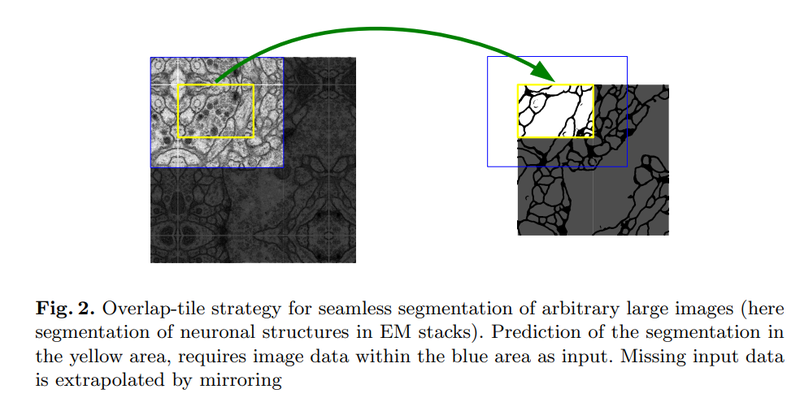

서로 겹치는 구간을 타일로 나누어서 네트워크를 추론한 후에 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있게 합니다.

*데이터 불균형 해결

클래스 간 데이터의 양의 불균형을 해결하기 위해 분포를 고려한 weight map를 학습 때 사용하면 됩니다.

*weight :손실함수(loss)에 적용되는 가중치입니다.


### DeepLab 계열

*역사

처음 DeepLab모델이 나온 후 모델 개선을 위해서 Atrous Convolution, Spatial Pyramid Pooling등 많은 방법들이 제안되었습니다.

이 블로그에선, DeepLabv3+의 전체 구조를 본 뒤 Dilated Convolution이라고 불리는 Atrous Convolution과 Spatial Pyramid Pooling를 살펴보도록하겠습니다.


*전체 구조

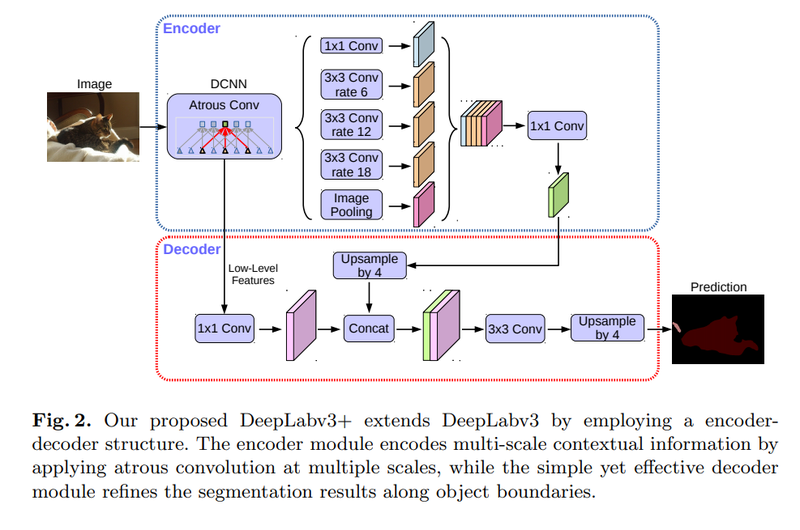
*Encoder,Decoder은 U-Net의 Contracting path 와 Expansive path역할과 같습니다.


- Encoder

이미지에서 필요한 정보를 특성으로 추출합니다.

- Decoder

추출된 특성을 이용해서 원하는  정보를 예측합니다.

- Atrous Convolution

3x3 Convolution을 대신 사용합니다.

- ASPP(Atrous Spatial Pyramid Pooling)

Atrous Convolution을 여러 크게에 다양하게 적용한 것으로 이 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해서 세그멘테이션 마스크를 얻고 있습니다.


#### DeepLabV3+

##### Atrous Convolution

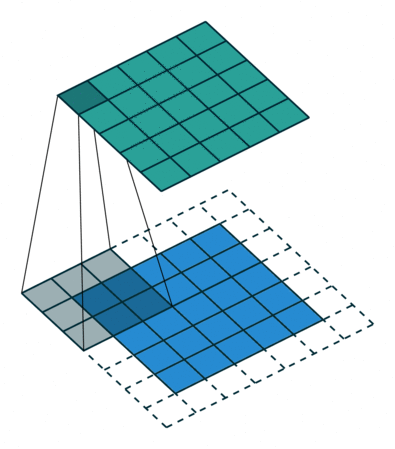

Atrous Convolution은 띄엄띄엄 보는 컨볼루션으로 좌측의 일반적인 컨볼루션과 달리 넓은 영역을 보게 해줍니다.

이로 인해 컨볼루션 레이어를 너무 깊게 쌓지 않고 넓은 영역의 정보를 커버할 수 있게 됩니다.


##### Spatial Pyramid Pooling

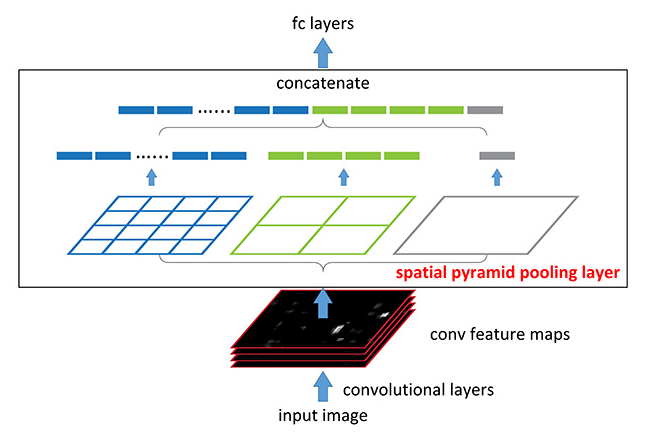

Spatial Pyramid Pooling는 여러 가지 스케일로 convolution과 pooling로 인해 나온 특성을 연결합니다.

이로 인해 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있습니다.

여기서, 컨볼루션을 Atrous convolution으로 바꾸어 적용한 것은 ASPP라고 합니다.

즉, 입력 이미지의 크기와 상관없이 동일구조를 활용할 수 있다는 장점을 갖고 있기에 제각기 다양한 비율을 가진 RoI영역에 대해 적용하기에 유리합니다.



---

## 세그멘테이션의 평가

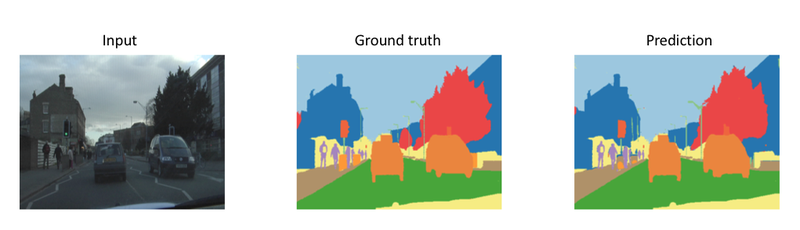
*픽셀의 수만큼의 분류문제로 평가할 수 있다.

시맨틱 세그멘테이션의 결과값은 이미지의 크기에 맞는 세그멘테이션 맵 크기와 시맨틱 클래스의 수에 맞는 채널 크기를 갖기에 각 채널의 max probability에 따라 해당 위치의 클래스가 결정됩니다.

### 픽셀별 정확도(Pixel Accuracy)

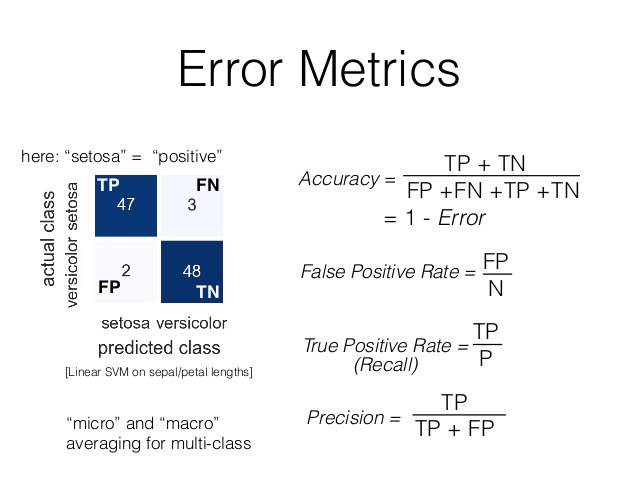

Pixel Accuracy는 픽셀에 따른 정확도를 의미합니다.

예를 들면, 세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제라고 생각을 하면, 우리는 이미지 분류 문제와 비슷하게 픽셀별 분류 정확도를 세그멘테이션 모델을 평가하는 기준이라 생각할 수 있게 됩니다.


예측 결과맵(prediction map)는 이진분류 문제로 생각하여 픽셀 및 채널별로 평가합니다.

픽셀별 이미지 분류 문제로 평가할 때는 정답 클래스를 맞추었는지 여부, 즉 Ture/False를 구분합니다.


### 마스크 IoU(Mask Intersection over-Union)

물체 검출 모델을 평가할 때는 정답 라벨과 예측결과 바운딩 박스 사이의 IoU를 사용합니다.


마스크도 일종의 영역이므로 세그멘테이션 문제에서는 정답인 영역과 예측한 영역 IoU를 계산할 수 있게 됩니다.

세그멘테이션 마스크의  IoU계산을 코드를 통해서 알려드리겠습니다.

#sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU점수를 얻게 됩니다. 이를 통해 평균하면 전체적인 시맨틱 세그멘테이션 성능을 가늠할 수 있게 됩니다.


---

## Upsampling의 다양한 방법

### Nearest Neighbor

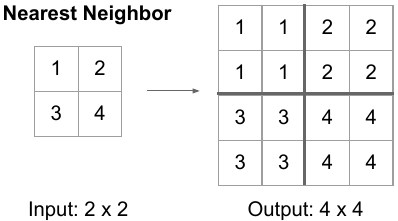

Nearest Neighbor은 말 그대로 scale을 키운 위치에서 가장 원본과 가까운 값을 그대로 적용하는 것입니다.

즉, 해당 값을 그대로 사용합니다.


### Bilinear Interpolation

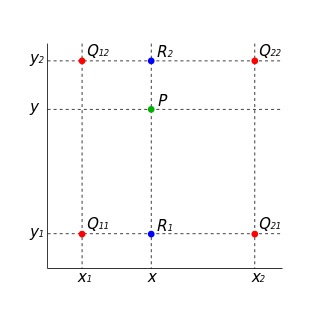

Bilinear Interpolation은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식으로 2x2 matrix를 4x4로 upsampling할 때 빈 값을 채워야합니다.

이때, 선형보간법을 사용하는 것으로 축의 두 방향을 활용하기에 Bilinear interpolation이라고 합니다.

위의 이미지를 설명하면, R1이 Q11과 Q21의 x축 방향의 interpolation결과입니다. R2는 Q12와 Q22의 x축 방향의 interpolation결과입니다.

R1,R2를 y축 방향으로 interpolation한다면 새로운 위치 P의 값을 추정할 수 있게 됩니다.

### Transposed Convolution

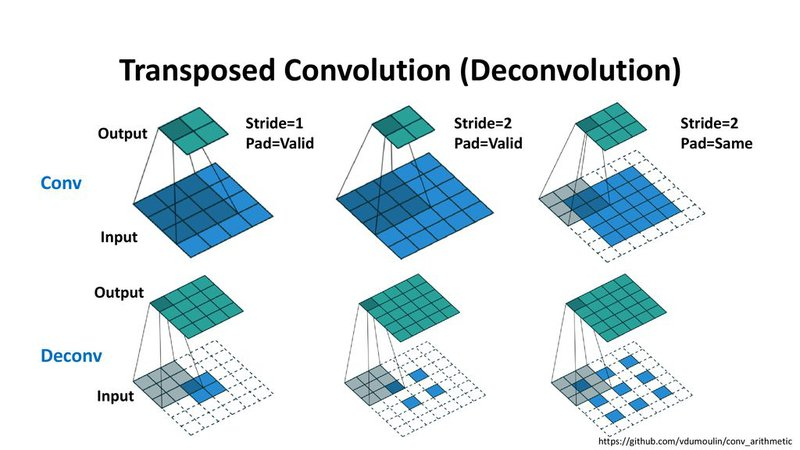


Transposed Convolution을 이용하면 학습할 수 있는 파라미터를 가진 Upsamplinng 방법이 있습니다.

이 convolution은 거꾸로 핛ㅂ된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정합니다.
